<a href="https://colab.research.google.com/github/nbeaudoin/PyTorch-marathon/blob/main/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn  ## nn contains all neural net building blocks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create known data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into train and test sets

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
### Visualize!

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot preds if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label=predictions)

    # SHow the legned
    plt.legend(prop={"size": 14});

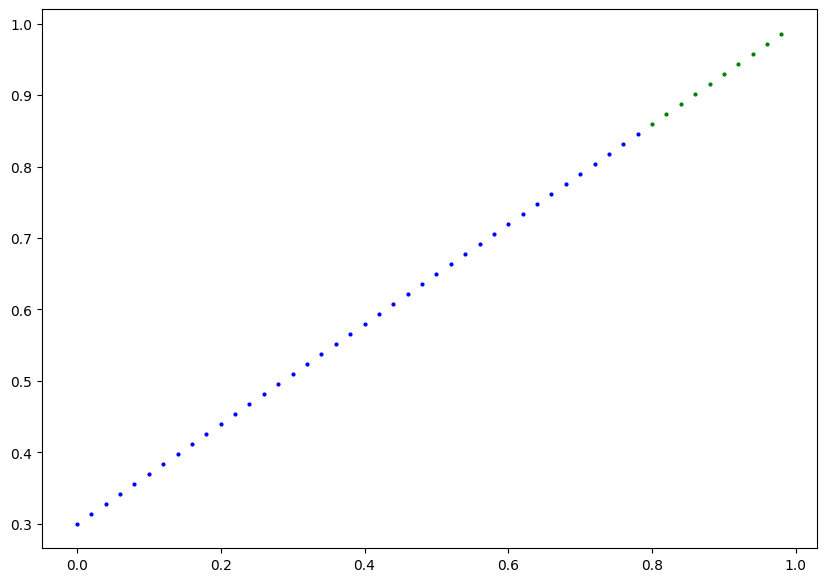

In [6]:
plot_predictions()

### 2. Build model

Goal is to start with random numbers and update those numbers to learn the pattern.

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values

How does it do so?

Through two main algos:
1. Gradient decsent -> https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropogration -> See above for series ^^^

In [7]:
import torch
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):  ## <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()   ## calls from the parent class
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))   ## float32 is default for PyTorch


    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:    ## "x" is the input data
    return self.weights * x + self.bias   ## this is the linear regression formula

### PyTorch model building essentials

* torch.nn: All building blocks for computational graphs
* torch.nn.Parameter: These will normally be set for us
* torch.nn.Module: Base class for all neural network moduels. If you subsclass it, you should overwrite forward()
* torch.optim: Optimizers help with gradient descent
* def forward() - All nn.Module subsclasses requires you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model let's see what's inside.

We can check out what is inside our model using `.parameters()`

In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [10]:
weight, bias

(0.7, 0.3)

The closer we can get these two values to our original values, the better our model will be. Beyond this simple case, we won't know what these values are.

### Making prediction using `torch.inference_mode()

To check out model's predictive power let's see how well it predicts `y_test` based on `X_test`

When we pass our data through our model, it's going to run it thorugh our forward method.

**Classes**: In Python, the `with` statement is used to simplify resource management, particularly when working with external resources like files or network connections. When used with classes, it typically involves using a special method called __enter__ to set up the resource and __exit__ to tear it down.

The with statement ensures that the __exit__ method is called even if an exception is raised during the execution of the code inside the with block. This is commonly referred to as a context manager.

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

This error happens often ^^^

Try changing the spacing

You can go into Settings to "show line numbers"

Notice that there are no gradients being tracked. More on this in a bit.

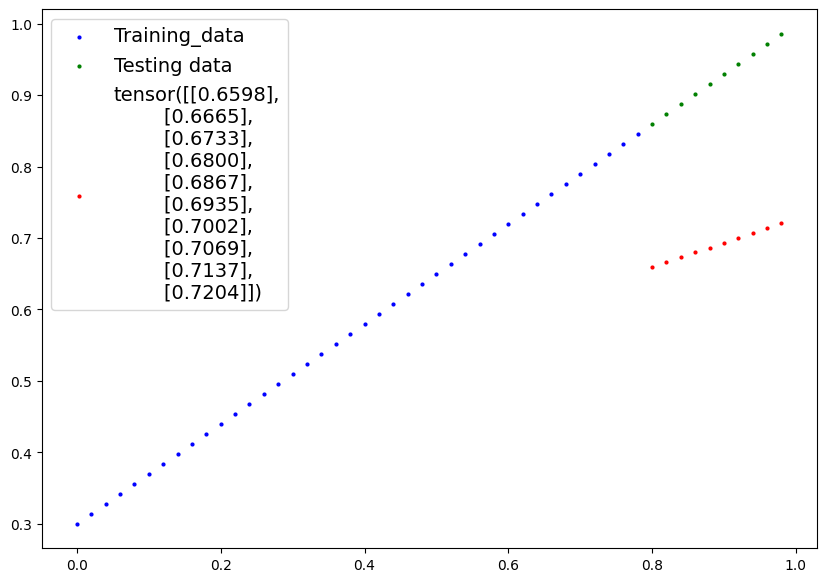

In [13]:
plot_predictions(predictions=y_preds)

Because our model is initialized with random parameters, the output is pretty random.

`inference_model()` makes predictions

 * `inference_mode()` won't have a `grad` function
 * `inference_mode()` disables all the useful things that we have available during training. This means that PyTorch is keeping track of less data and our predictions will be faster because we are not keeping track of gradients that are being saved to memory
 * You can do the same thing with `toch.no_grad()` but `inference_mode()` is preferred.


## 3. Train model

The idea is for our model to move from some unknown parameters to some known parameters.

Or in other words from a poor representation of the data to a better representation.

One way to measure how poor or how wrong the model's predictions are is to use a loss function.

AKA: cost function, loss function, criteria

* **Loss function**: A function that can measure how wrong our model's predictions are from the ideal outputs.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (eg weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()  ## MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), ## what params should I optimize?
                            lr=0.01)  ## default=0.1

Starts by randomly assigning these values

### Building a training (and testing) loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) - also called forwrd propogation - make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - the gradients of each of the gradients of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our parameters to improve the loss (**gradient descent**)


In [18]:
# An epoch is one loop through the data... (this is a hyperparameter because we set it ourselves)
epochs = 10
# Note: Our models in the future will have parameters set automatically

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training model
  model_0.train() # train mode in PyTorch set

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  #5. Step the optimizer (gradient descent)
  optimizer.step() ## how the optimizer will accumulate through the loop
  ## need to zero them in step 3
  ##  The reason for zeroing the gradients is to prevent the gradients from accumulating across multiple iterations.

  ### Testing
  model_0.eval() # turns off the gradient tracking, dropout, batch-norm layers

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.08169572055339813
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Loss: 0.07951223105192184
OrderedDict([('weights', tensor([0.3428])), ('bias', tensor([0.3969]))])
Loss: 0.07771821320056915
OrderedDict([('weights', tensor([0.3458])), ('bias', tensor([0.3999]))])
Loss: 0.07596267759799957
OrderedDict([('weights', tensor([0.3486])), ('bias', tensor([0.4024]))])
Loss: 0.07452543079853058
OrderedDict([('weights', tensor([0.3515])), ('bias', tensor([0.4049]))])
Loss: 0.07310795783996582
OrderedDict([('weights', tensor([0.3542])), ('bias', tensor([0.4069]))])
Loss: 0.07197895646095276
OrderedDict([('weights', tensor([0.3569])), ('bias', tensor([0.4089]))])
Loss: 0.0708499550819397
OrderedDict([('weights', tensor([0.3596])), ('bias', tensor([0.4109]))])
Loss: 0.0698218122124672
OrderedDict([('weights', tensor([0.3621])), ('bias', tensor([0.4124]))])
Loss: 0.06895165145397186
OrderedDict([('weights', tensor([0.3647])), ('bias', tensor([0.4139]))])


In this example, `optimizer.zero_grad()` is called before the backward pass to clear the gradients. It's an essential practice to ensure accurate and consistent parameter updates during the training process.

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3647])), ('bias', tensor([0.4139]))])

In [21]:
weight, bias

(0.7, 0.3)

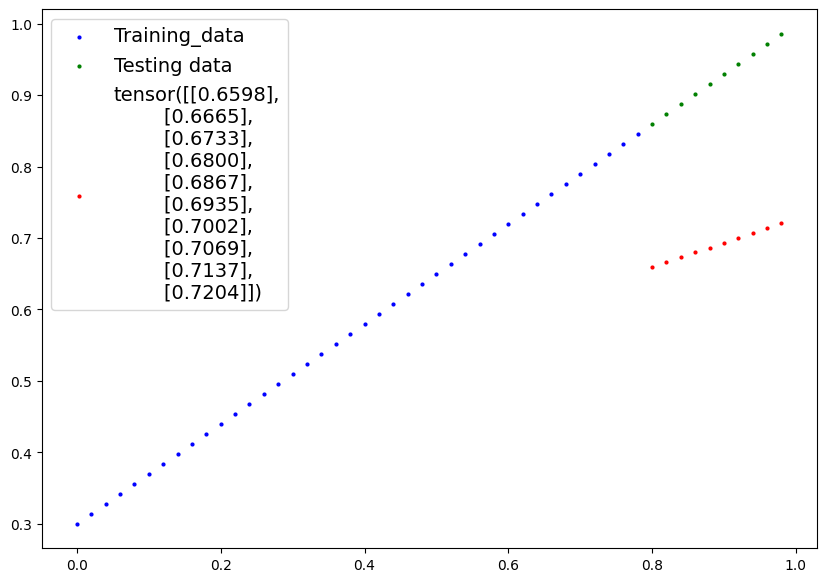

In [22]:
# Old plot
plot_predictions(predictions=y_preds)

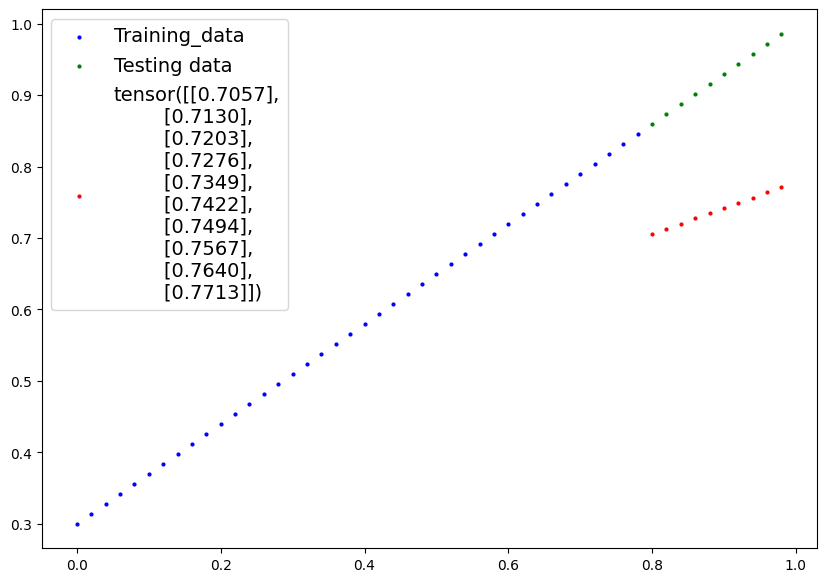

In [23]:
# New plot
plot_predictions(predictions=y_preds_new)

In [24]:
### TO DO: Change the epochs and re-run to see if the loss changes

### Testing

We are turning off things that we don't need anymore that we used in training. These include:
 - gradient descent
 - dropout
 - batch

In [25]:
### Re-instantiate the model and optimizer

torch.manual_seed(42)

# Re-instantiate our model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

# Setup a loss function
loss_fn = nn.L1Loss()  ## MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), ## what params should I optimize?
                            lr=0.01)  ## default=0.1

Note: You will need to re-instantiate the `optimizer` because it is taking in the old model params.

In [26]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      if epoch % 10 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.08169572055339813 | MAE Test Loss: 0.22662055492401123 
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | MAE Train Loss: 0.06808149069547653 | MAE Test Loss: 0.1807345449924469 
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | MAE Train Loss: 0.06258393079042435 | MAE Test Loss: 0.15627031028270721 
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | MAE Train Loss: 0.05879194289445877 | MAE Test Loss: 0.1418602615594864 
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | MAE Train Loss: 0.05530194193124771 | MAE Test Loss: 0.13084018230438232 
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | MAE Train Loss: 0.051822252571582794 | MAE Test Loss: 0.12050700187683105 
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | MAE Train Loss: 0.04838593676686287 

`torch.no_grad()` is an older method

If you are having issues of convergence, re-run the entire notebook

### Let's make a visual of this process

In [27]:
### Re-instantiate the model and optimizer

torch.manual_seed(42)

# Re-instantiate our model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

# Setup a loss function
loss_fn = nn.L1Loss()  ## MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), ## what params should I optimize?
                            lr=0.01)  ## default=0.1

In [28]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.08169572055339813 | MAE Test Loss: 0.22662055492401123 
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | MAE Train Loss: 0.06808149069547653 | MAE Test Loss: 0.1807345449924469 
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | MAE Train Loss: 0.06258393079042435 | MAE Test Loss: 0.15627031028270721 
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | MAE Train Loss: 0.05879194289445877 | MAE Test Loss: 0.1418602615594864 
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | MAE Train Loss: 0.05530194193124771 | MAE Test Loss: 0.13084018230438232 
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | MAE Train Loss: 0.051822252571582794 | MAE Test Loss: 0.12050700187683105 
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | MAE Train Loss: 0.04838593676686287 

RuntimeError: ignored

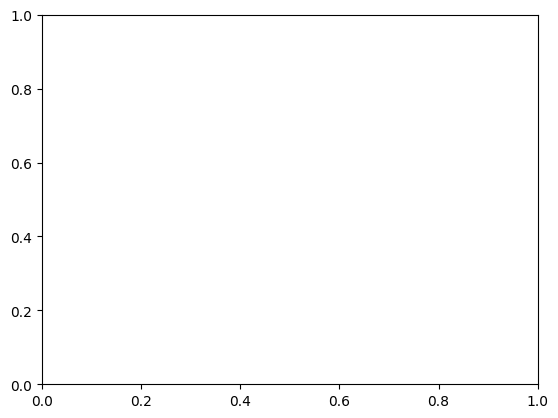

In [29]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

This will throw an error!



In [30]:
# Let's see where the error is coming from
loss.values, test_loss_values

(<function Tensor.values>,
 [tensor(0.2266),
  tensor(0.1807),
  tensor(0.1563),
  tensor(0.1419),
  tensor(0.1308),
  tensor(0.1205),
  tensor(0.1122),
  tensor(0.1046),
  tensor(0.0964),
  tensor(0.0881),
  tensor(0.0805),
  tensor(0.0722),
  tensor(0.0640),
  tensor(0.0564),
  tensor(0.0481),
  tensor(0.0398),
  tensor(0.0323),
  tensor(0.0240),
  tensor(0.0157),
  tensor(0.0081)])

In [32]:
# Let's fix it
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.08169572, 0.06808149, 0.06258393, 0.05879194, 0.05530194,
        0.05182225, 0.04838594, 0.04494876, 0.04152032, 0.03808232,
        0.03464684, 0.03121751, 0.02777871, 0.0243449 , 0.0209139 ,
        0.01747509, 0.01404297, 0.01061027, 0.00717147, 0.00374104],
       dtype=float32),
 [tensor(0.2266),
  tensor(0.1807),
  tensor(0.1563),
  tensor(0.1419),
  tensor(0.1308),
  tensor(0.1205),
  tensor(0.1122),
  tensor(0.1046),
  tensor(0.0964),
  tensor(0.0881),
  tensor(0.0805),
  tensor(0.0722),
  tensor(0.0640),
  tensor(0.0564),
  tensor(0.0481),
  tensor(0.0398),
  tensor(0.0323),
  tensor(0.0240),
  tensor(0.0157),
  tensor(0.0081)])

These are all tensor values!

We need to change some things to Numpy

You the `detach` method!

In PyTorch, the `detach` method is used to create a new tensor that shares the same data as the original tensor but doesn't require gradients. It effectively "detaches" the tensor from the computation graph, preventing further gradient computation for that tensor.

In [33]:
### Re-instantiate the model and optimizer

torch.manual_seed(42)

# Re-instantiate our model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

# Setup a loss function
loss_fn = nn.L1Loss()  ## MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), ## what params should I optimize?
                            lr=0.01)  ## default=0.1

In [34]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())  ## See note on `detach` method below
            test_loss_values.append(test_loss.detach().numpy())  ## See note on `detach` method below
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.08169572055339813 | MAE Test Loss: 0.22662055492401123 
Epoch: 10 | MAE Train Loss: 0.06808149069547653 | MAE Test Loss: 0.1807345449924469 
Epoch: 20 | MAE Train Loss: 0.06258393079042435 | MAE Test Loss: 0.15627031028270721 
Epoch: 30 | MAE Train Loss: 0.05879194289445877 | MAE Test Loss: 0.1418602615594864 
Epoch: 40 | MAE Train Loss: 0.05530194193124771 | MAE Test Loss: 0.13084018230438232 
Epoch: 50 | MAE Train Loss: 0.051822252571582794 | MAE Test Loss: 0.12050700187683105 
Epoch: 60 | MAE Train Loss: 0.04838593676686287 | MAE Test Loss: 0.11223447322845459 
Epoch: 70 | MAE Train Loss: 0.044948760420084 | MAE Test Loss: 0.10464880615472794 
Epoch: 80 | MAE Train Loss: 0.04152031987905502 | MAE Test Loss: 0.09637625515460968 
Epoch: 90 | MAE Train Loss: 0.03808232396841049 | MAE Test Loss: 0.08810374140739441 
Epoch: 100 | MAE Train Loss: 0.034646838903427124 | MAE Test Loss: 0.08051808178424835 
Epoch: 110 | MAE Train Loss: 0.031217509880661964 | MAE 

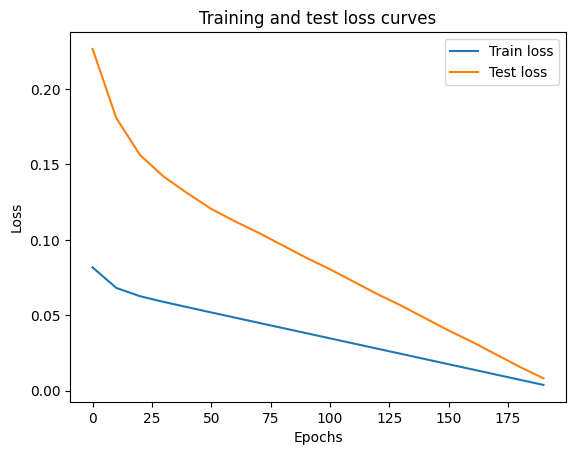

In [35]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")  ## this is new, see note ^^^
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

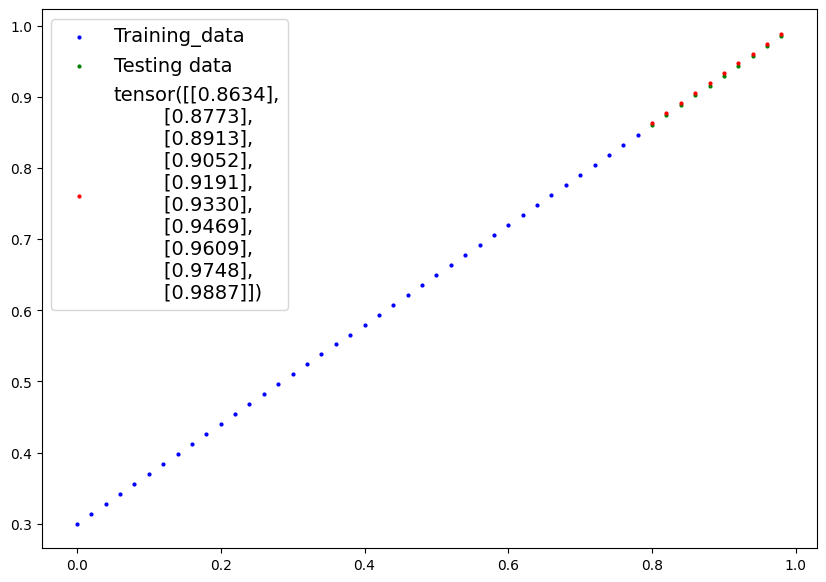

In [36]:
### Let's see our predictions
with torch.inference_mode():
  y_preds_final = model_0(X_test)

# Final plot
plot_predictions(predictions=y_preds_final)

## How to save a trained model

What happens when we come back later and the notebook kernel is dead. This is really important if we have a large model that took a long time to train!

There are 3 main methods for saving and loading models in PyTorch:

1. `torch.save()` - allows us to save our PyTorch object in pickle format.
2.